<a href="https://colab.research.google.com/github/barta3235/working_model_VGG19/blob/main/VGG19_98R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

::Model path: /content/drive/MyDrive/498R_models/VGG19-Model114.keras

---



---



In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import cv2
import matplotlib.pyplot as plt
!pip install lime
from lime.lime_image import LimeImageExplainer
import skimage.color as color
from skimage.segmentation import mark_boundaries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
import cv2
from lime.lime_image import LimeImageExplainer


<ipython-input-1-2726b41bbe1b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3c990bd09bdea13234e19cd5cd72a5513e5d905ac481dc20c7be60360f3c8780
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Dataset498R/Positive')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/Dataset498R/Negative')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,3523):
    y.append('N')
print(y)

  0%|          | 0/3531 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/3522 [00:00<?, ?it/s]

7053
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

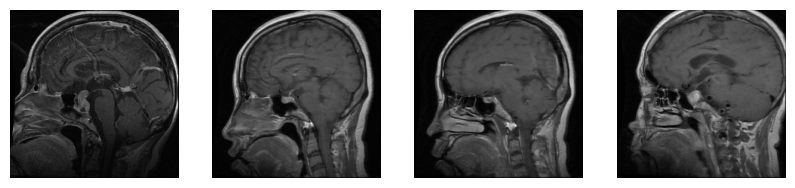

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (4937, 224, 224, 3)
X_test Shape:  (2116, 224, 224, 3)
y_train Shape:  (4937, 2)
y_test Shape:  (2116, 2)


In [ ]:
from keras.applications import vgg19

img_rows, img_cols = 224, 224

vgg = vgg19.VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))

for layer in vgg.layers:
    layer.trainable = False

for (i, layer) in enumerate(vgg.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False


In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Conv2D(256, (3, 3), activation='relu')(top_model)
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs=vgg.input, outputs=FC_Head)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,042,882 (87.90 MB)

 Trainable params: 3,018,498 (11.51 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

None


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    batch_size=32,
                    initial_epoch=0)

Epoch 1/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 5843s 38s/step - accuracy: 0.8680 - false_positives: 219.5833 - loss: 1.5176 - specificity_at_sensitivity: 0.9391 - true_negatives: 2291.9167 - val_accuracy: 0.9820 - val_false_positives: 38.0000 - val_loss: 0.0753 - val_specificity_at_sensitivity: 0.9967 - val_true_negatives: 2078.0000
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 5780s 37s/step - accuracy: 0.9810 - false_positives: 44.6346 - loss: 0.0540 - specificity_at_sensitivity: 0.9982 - true_negatives: 2466.8655 - val_accuracy: 0.9513 - val_false_positives: 103.0000 - val_loss: 0.1942 - val_specificity_at_sensitivity: 0.9877 - val_true_negatives: 2013.0000
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 5710s 37s/step - accuracy: 0.9814 - false_positives: 39.8077 - loss: 0.0457 - specificity_at_sensitivity: 1.0000 - true_negatives: 2471.6924 - val_accuracy: 0.9877 - val_false_positives: 26.0000 - val_loss: 0.0372 - val_specificity_at_sensitivity: 0.9986 - val_true_negatives: 2090.0000


In [ ]:
model.save('/content/drive/MyDrive/498R_models/VGG19-Model111.keras')

In [ ]:
from tensorflow.keras.models import load_model

tempModel = load_model('/content/drive/MyDrive/498R_models/VGG19-Model111.keras')
history = tempModel.fit(X_train,y_train,
                    epochs=6,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=3)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 4/6
155/155 ━━━━━━━━━━━━━━━━━━━━ 5026s 32s/step - accuracy: 0.9695 - false_positives: 48.5256 - loss: 0.1729 - specificity_at_sensitivity: 0.9914 - true_negatives: 2462.9744 - val_accuracy: 0.9896 - val_false_positives: 22.0000 - val_loss: 0.0566 - val_specificity_at_sensitivity: 0.9962 - val_true_negatives: 2094.0000
Epoch 5/6
155/155 ━━━━━━━━━━━━━━━━━━━━ 5021s 32s/step - accuracy: 0.9991 - false_positives: 3.7051 - loss: 0.0044 - specificity_at_sensitivity: 0.9998 - true_negatives: 2507.7949 - val_accuracy: 0.9877 - val_false_positives: 26.0000 - val_loss: 0.0393 - val_specificity_at_sensitivity: 0.9981 - val_true_negatives: 2090.0000
Epoch 6/6
155/155 ━━━━━━━━━━━━━━━━━━━━ 5046s 32s/step - accuracy: 0.9964 - false_positives: 10.8654 - loss: 0.0145 - specificity_at_sensitivity: 0.9991 - true_negatives: 2500.6345 - val_accuracy: 0.9887 - val_false_positives: 24.0000 - val_loss: 0.0425 - val_specificity_at_sensitivity: 0.9981 - val_true_negatives: 2092.0000


In [ ]:
tempModel.save('/content/drive/MyDrive/498R_models/VGG19-Model112.keras')

In [ ]:
from tensorflow.keras.models import load_model

tempModel2 = load_model('/content/drive/MyDrive/498R_models/VGG19-Model112.keras')
history = tempModel2.fit(X_train,y_train,
                    epochs=9,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=6)

Epoch 7/9
155/155 ━━━━━━━━━━━━━━━━━━━━ 6011s 39s/step - accuracy: 0.9972 - false_positives: 7.7500 - loss: 0.0112 - specificity_at_sensitivity: 0.9994 - true_negatives: 2503.7500 - val_accuracy: 0.9901 - val_false_positives: 21.0000 - val_loss: 0.0554 - val_specificity_at_sensitivity: 0.9967 - val_true_negatives: 2095.0000
Epoch 8/9
155/155 ━━━━━━━━━━━━━━━━━━━━ 5911s 38s/step - accuracy: 0.9995 - false_positives: 1.7179 - loss: 0.0026 - specificity_at_sensitivity: 0.9999 - true_negatives: 2509.7820 - val_accuracy: 0.9882 - val_false_positives: 25.0000 - val_loss: 0.0774 - val_specificity_at_sensitivity: 0.9953 - val_true_negatives: 2091.0000
Epoch 9/9
155/155 ━━━━━━━━━━━━━━━━━━━━ 5896s 38s/step - accuracy: 0.9985 - false_positives: 3.8462 - loss: 0.0089 - specificity_at_sensitivity: 0.9996 - true_negatives: 2507.6538 - val_accuracy: 0.9905 - val_false_positives: 20.0000 - val_loss: 0.0507 - val_specificity_at_sensitivity: 0.9967 - val_true_negatives: 2096.0000


In [ ]:
tempModel2.save('/content/drive/MyDrive/498R_models/VGG19-Model113.keras')

In [ ]:
from tensorflow.keras.models import load_model

tempModel3 = load_model('/content/drive/MyDrive/498R_models/VGG19-Model113.keras')
history = tempModel3.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    batch_size=32,
                    initial_epoch=9)


Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 4990s 32s/step - accuracy: 1.0000 - false_positives: 0.0000e+00 - loss: 8.5900e-05 - specificity_at_sensitivity: 1.0000 - true_negatives: 2511.5000 - val_accuracy: 0.9920 - val_false_positives: 17.0000 - val_loss: 0.0783 - val_specificity_at_sensitivity: 0.9953 - val_true_negatives: 2099.0000


In [ ]:
tempModel3.save('/content/drive/MyDrive/498R_models/VGG19-Model114.keras')

67/67 ━━━━━━━━━━━━━━━━━━━━ 1494s 22s/step


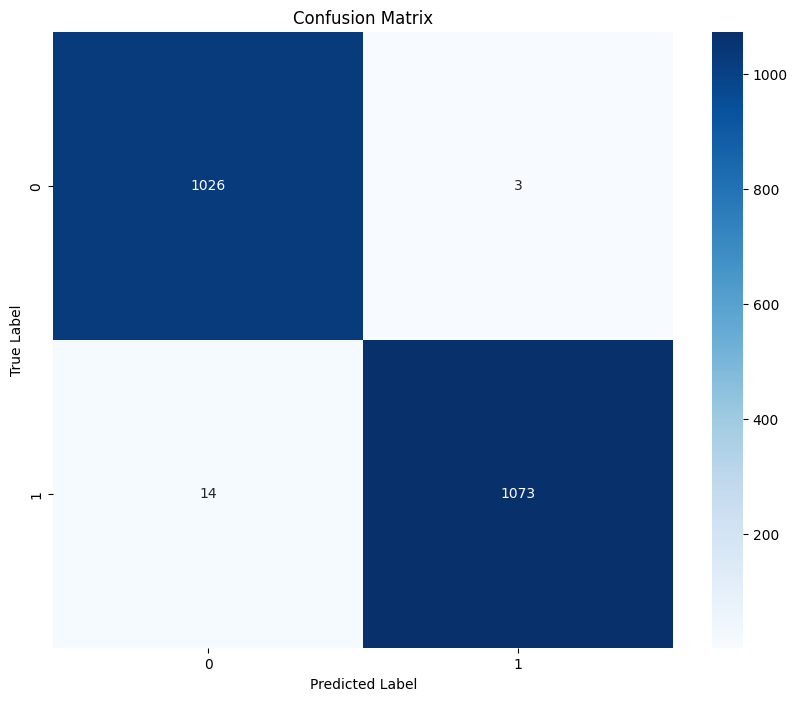

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/MyDrive/498R_models/VGG19-Model114.keras')

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Assuming a classification problem with softmax output
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

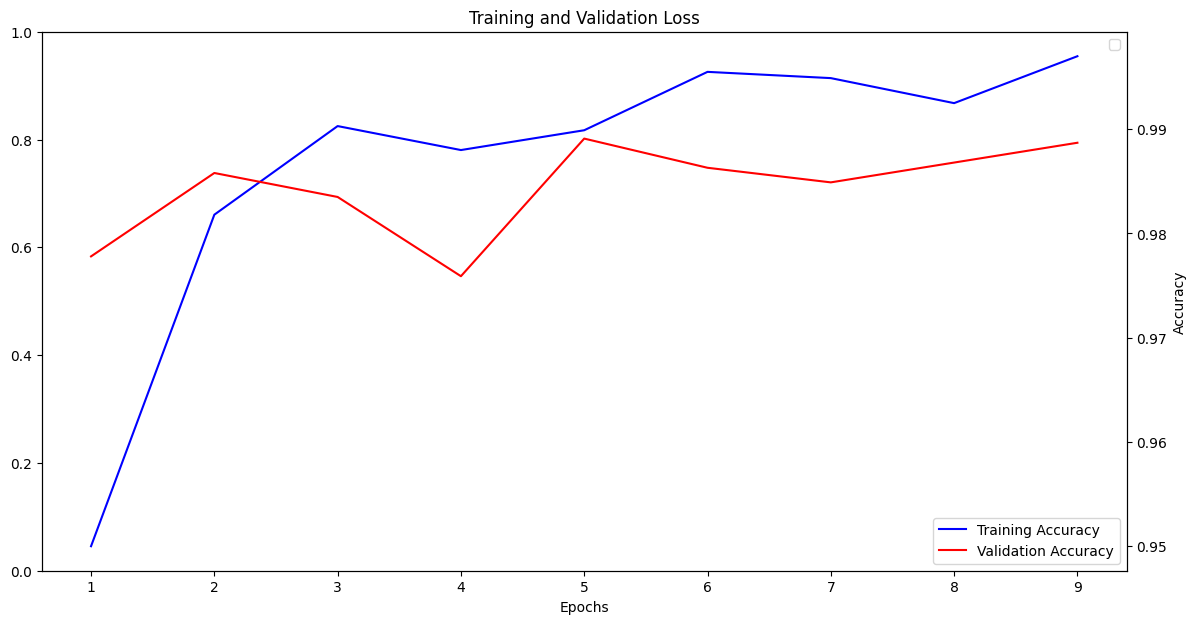

In [ ]:
import matplotlib.pyplot as plt

# Extracted data from the provided epochs information
epochs = list(range(1, 10))

# Training data
train_loss = [0.2627, 0.0604, 0.0325, 0.0574, 0.0605, 0.0169, 0.0227, 0.0279, 0.0112]
train_accuracy = [0.9500, 0.9818, 0.9903, 0.9880, 0.9899, 0.9955, 0.9949, 0.9925, 0.9970]

# Validation data
val_loss = [0.0672, 0.0478, 0.0661, 0.0786, 0.0475, 0.0910, 0.0889, 0.0645, 0.1051]
val_accuracy = [0.9778, 0.9858, 0.9835, 0.9759, 0.9891, 0.9863, 0.9849, 0.9868, 0.9887]

# Create subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot loss

ax1.set_xlabel('Epochs')

ax1.legend(loc='upper right')
ax1.set_title('Training and Validation Loss')

# Create another Y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

plt.show()


**Testing the model**

**Negative For Tumor**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/paperimage/Y_Tr-gl_1320 (190).jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)

TypeError: Could not deserialize class 'Functional' because its parent module keras.src.models.functional cannot be imported. Full object config: {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'functional', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block1_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 3]}, 'name': 'block1_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 3], 'dtype': 'float32', 'keras_history': ['input_layer', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block1_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 64]}, 'name': 'block1_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 64], 'dtype': 'float32', 'keras_history': ['block1_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block1_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 64]}, 'name': 'block1_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 64], 'dtype': 'float32', 'keras_history': ['block1_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block2_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 64]}, 'name': 'block2_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 64], 'dtype': 'float32', 'keras_history': ['block1_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block2_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 128]}, 'name': 'block2_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 128], 'dtype': 'float32', 'keras_history': ['block2_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block2_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 128]}, 'name': 'block2_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 128], 'dtype': 'float32', 'keras_history': ['block2_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 128]}, 'name': 'block3_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 128], 'dtype': 'float32', 'keras_history': ['block2_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv3', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv4', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_conv4', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block3_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv4', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 256]}, 'name': 'block4_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 256], 'dtype': 'float32', 'keras_history': ['block3_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv3', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv4', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_conv4', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block4_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv4', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block4_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv3', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv4', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv4', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block5_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv4', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 7, 7, 512]}, 'name': 'conv2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 7, 7, 512], 'dtype': 'float32', 'keras_history': ['block5_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'GlobalAveragePooling2D', 'config': {'name': 'global_average_pooling2d', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'data_format': 'channels_last', 'keepdims': False}, 'registered_name': None, 'build_config': {'input_shape': [None, 5, 5, 256]}, 'name': 'global_average_pooling2d', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 5, 5, 256], 'dtype': 'float32', 'keras_history': ['conv2d', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 1024, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}, 'name': 'dense', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 256], 'dtype': 'float32', 'keras_history': ['global_average_pooling2d', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 1024, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1024]}, 'name': 'dense_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 1024], 'dtype': 'float32', 'keras_history': ['dense', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1024]}, 'name': 'dense_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 1024], 'dtype': 'float32', 'keras_history': ['dense_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 2, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512]}, 'name': 'dense_3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 512], 'dtype': 'float32', 'keras_history': ['dense_2', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_layer', 0, 0]], 'output_layers': [['dense_3', 0, 0]]}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'RMSprop', 'config': {'name': 'rmsprop', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'rho': 0.9, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'registered_name': None}, 'loss': 'categorical_crossentropy', 'loss_weights': None, 'metrics': ['accuracy', {'module': 'keras.metrics', 'class_name': 'TrueNegatives', 'config': {'name': 'true_negatives', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'FalsePositives', 'config': {'name': 'false_positives', 'dtype': 'float32', 'thresholds': None}, 'registered_name': None}, {'module': 'keras.metrics', 'class_name': 'SpecificityAtSensitivity', 'config': {'name': 'specificity_at_sensitivity', 'dtype': 'float32', 'class_id': None, 'num_thresholds': 200, 'sensitivity': 0.5}, 'registered_name': None}], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}

**Positive For Tumor**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Specify the path to your model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'

# Load the pre-trained model
model = load_model(model_path)

# Specify the path to the uploaded image
uploaded_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl3_0105.jpg'

# Load and preprocess the image
img = image.load_img(uploaded_image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > prediction[0][1]:
    result = "No Tumor"
else:
    result = "Tumor"

print("Prediction: ", result)

1/1 [==============================] - 1s 1s/step
Prediction:  Tumor


**LIME**

1

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━

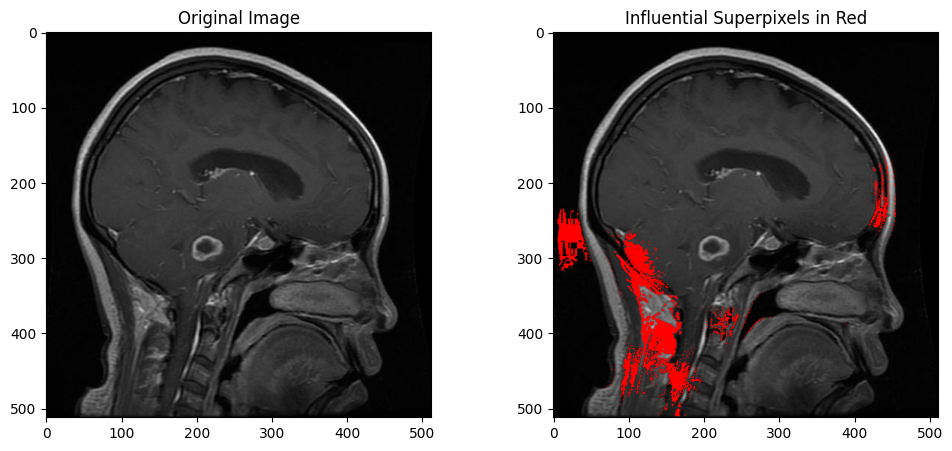

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.12000807 0.8799919 ]]
Masked Prediction: [[0.14503632 0.8549637 ]]


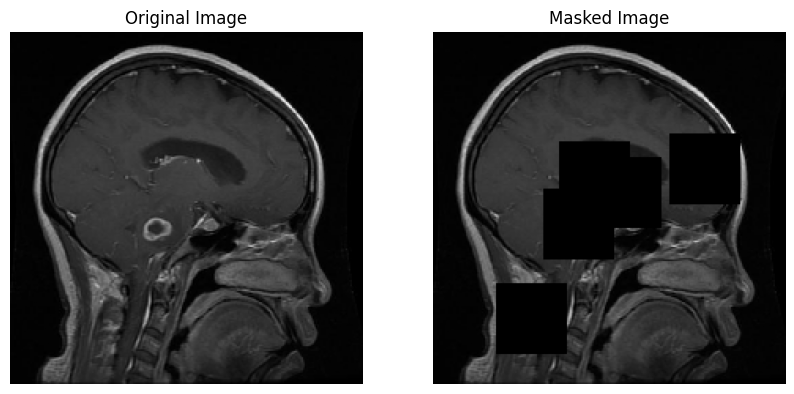

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(100,70),(80,100),(70,80),(65,150),(160,40)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━

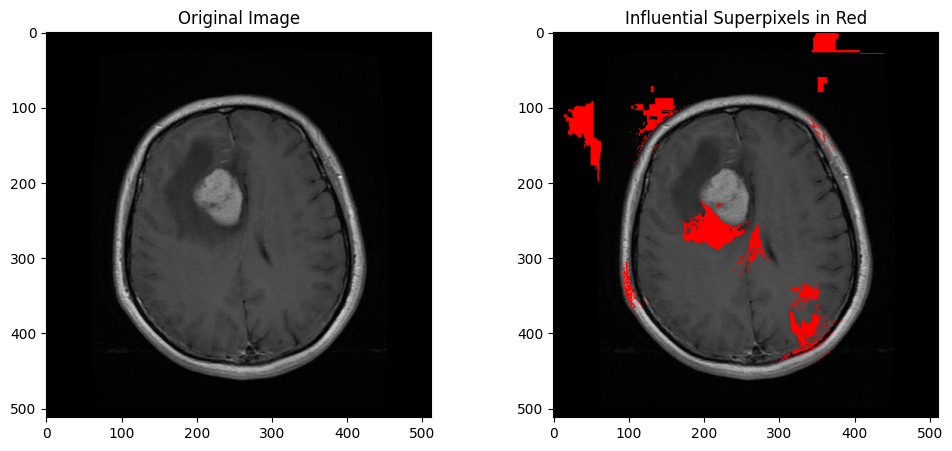

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.30332896 0.69667107]]
Masked Prediction: [[0.43393657 0.5660634 ]]


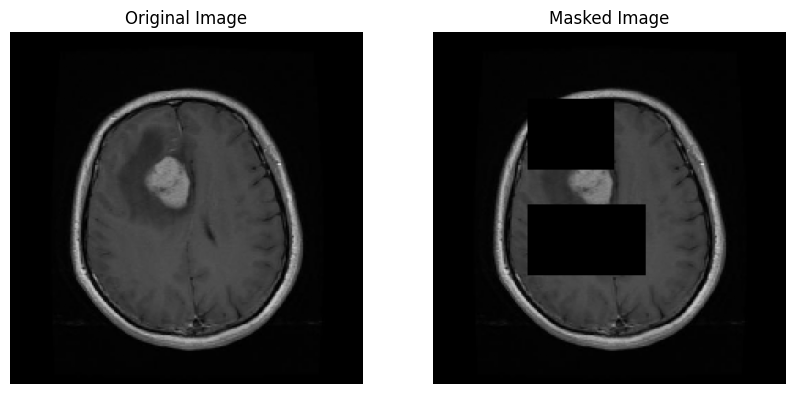

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(43,70),(43,60),(110,90),(110,60)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 

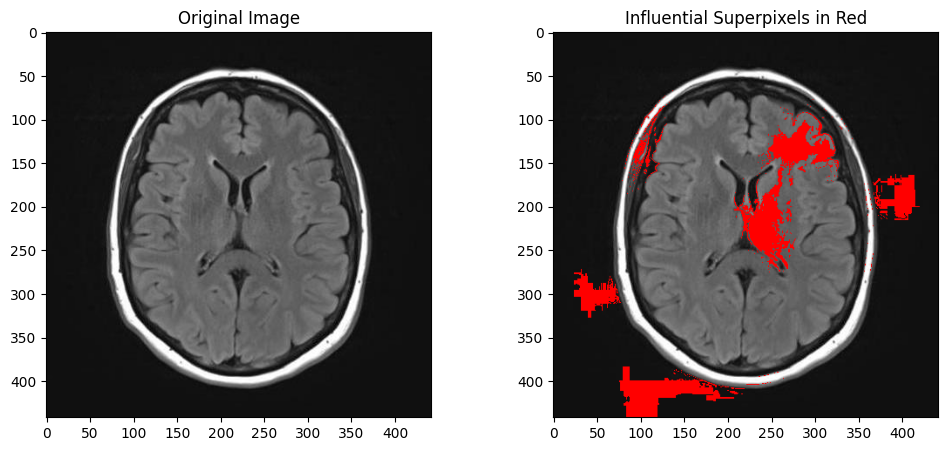

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-no1_0348.jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=1000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 

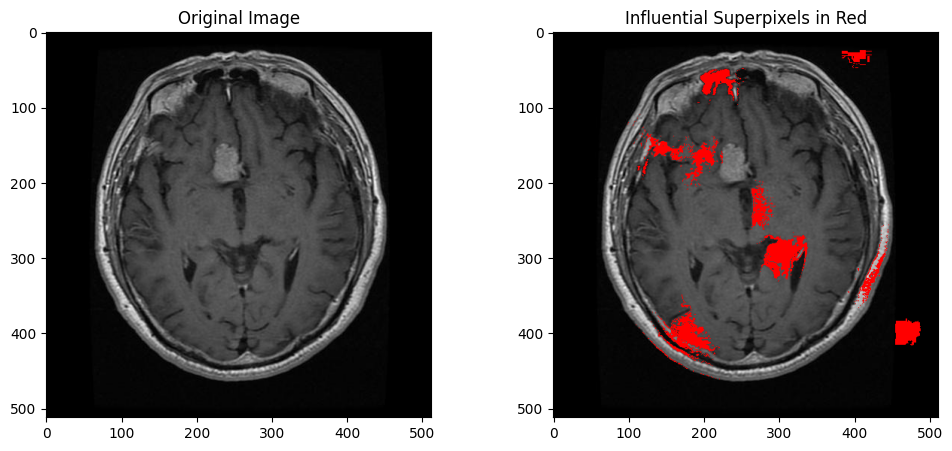

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.34065017 0.6593498 ]]
Masked Prediction: [[0.41741425 0.58258575]]


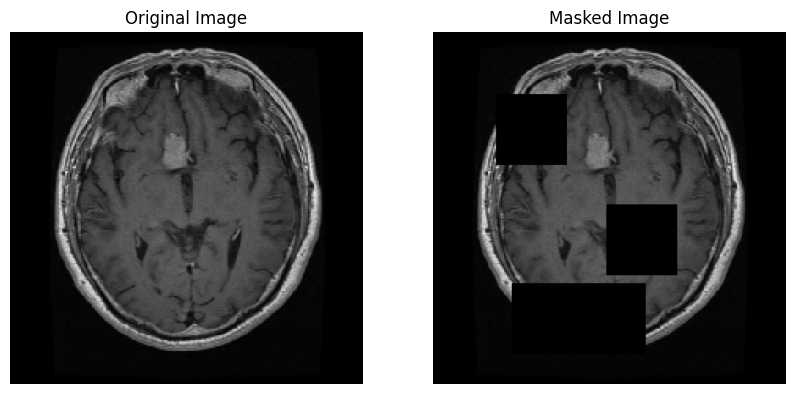

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(40,40),(110,110),(160,90),(160,50)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


**GRAD_CAM**

1

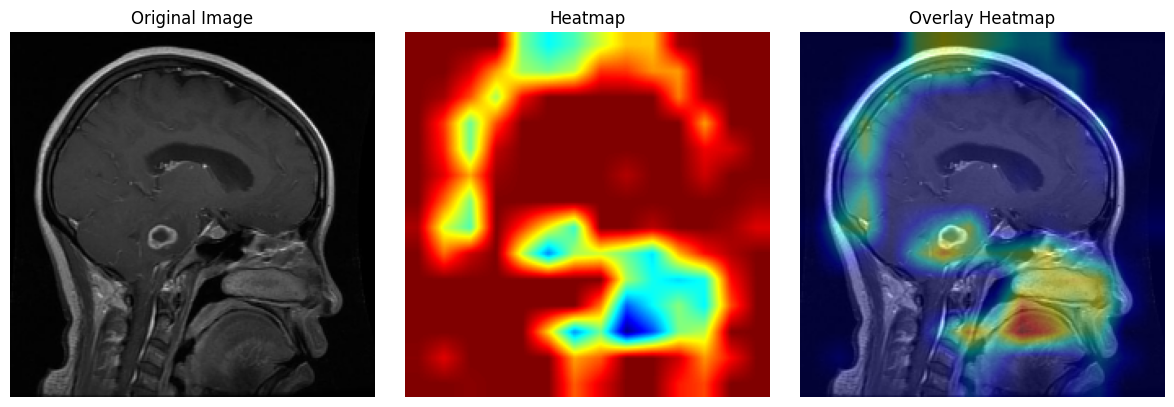

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.12000807 0.8799919 ]]
Masked Prediction: [[0.17503825 0.8249618 ]]


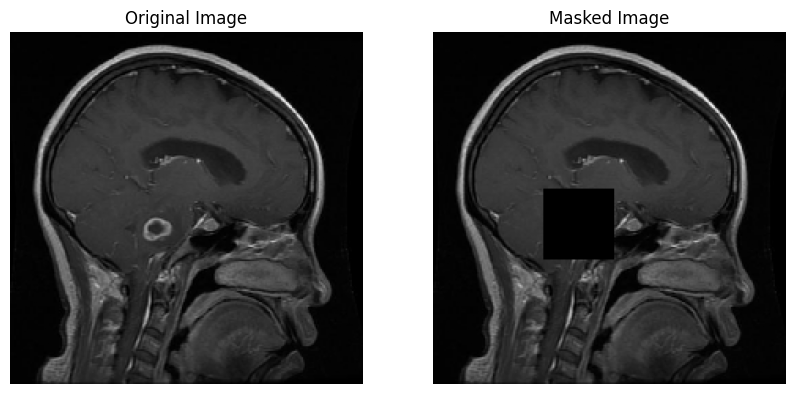

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(100,70)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


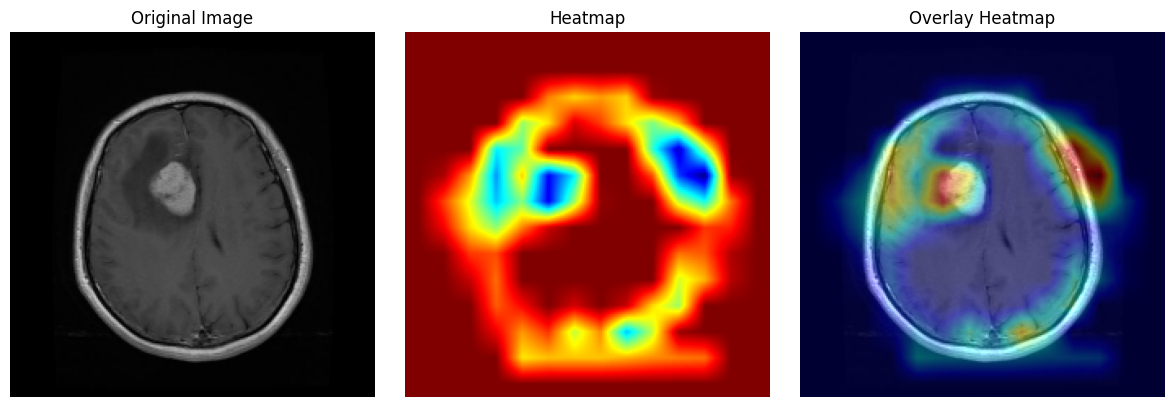

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.30332896 0.69667107]]
Masked Prediction: [[0.4603411  0.53965896]]


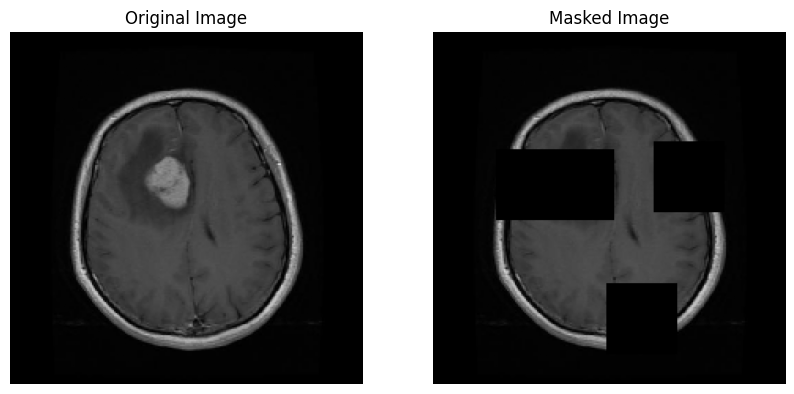

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(75,70),(75,40),(70,140),(160,110)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


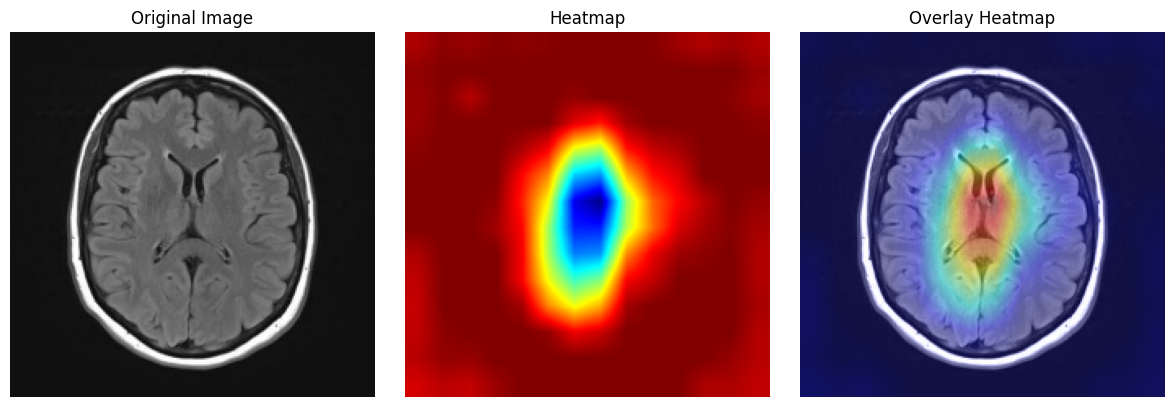

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-no1_0348.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


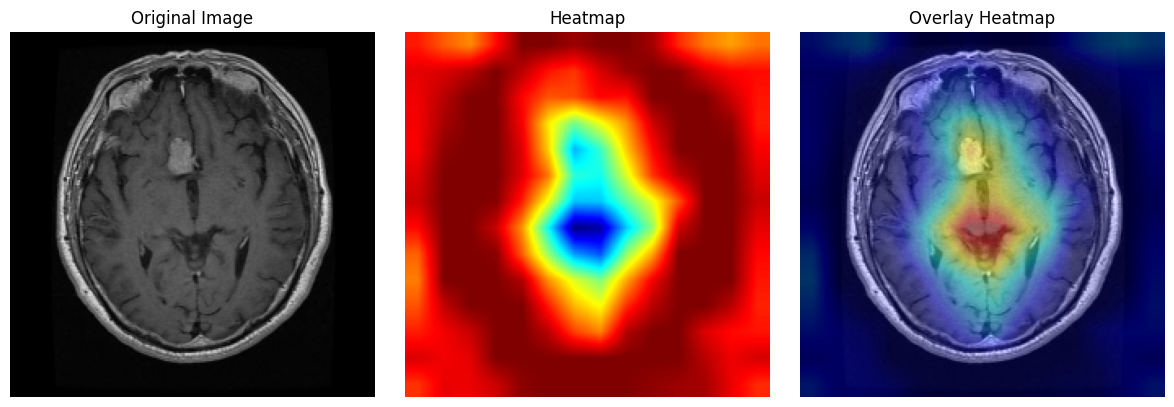

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.34065017 0.6593498 ]]
Masked Prediction: [[0.38735285 0.6126471 ]]


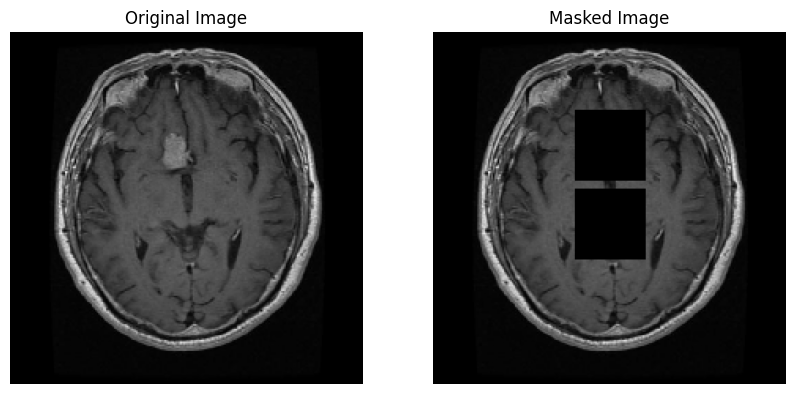

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(100,90),(50,90)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


**SHAP**

1

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


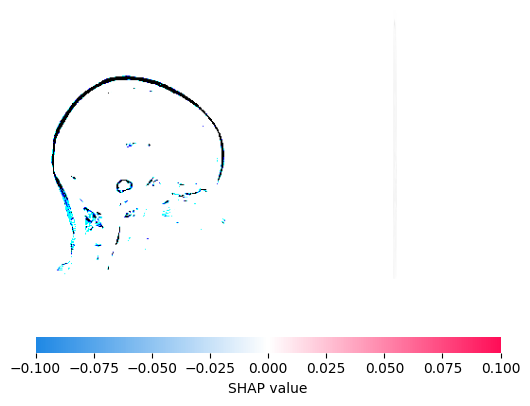

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.12000807 0.8799919 ]]
Masked Prediction: [[0.23692498 0.763075  ]]


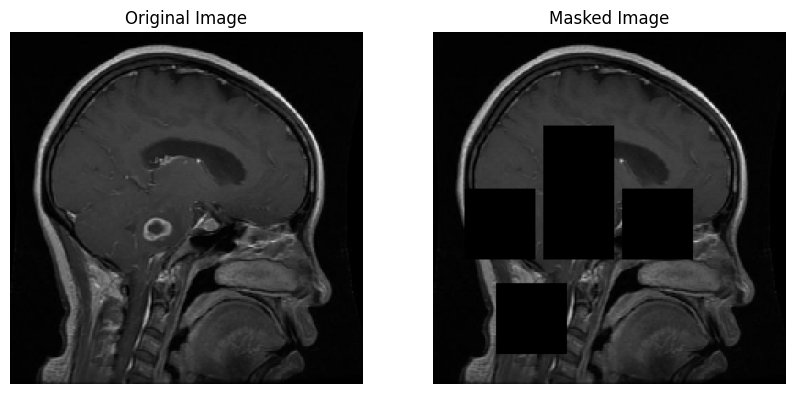

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(100,70),(160,40),(100,20),(60,70),(100,120)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


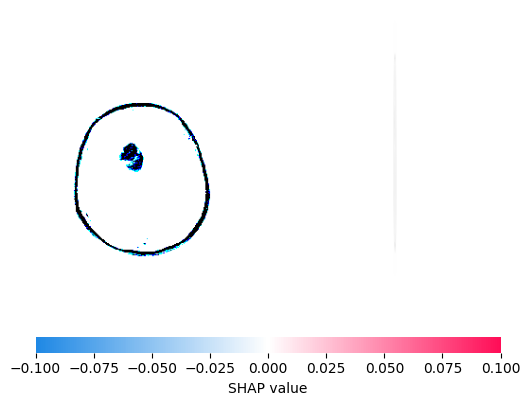

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


1/1 [==============================] - 1s 1s/step
Original Prediction: [[0.30332896 0.69667107]]
Masked Prediction: [[0.3579406 0.6420593]]


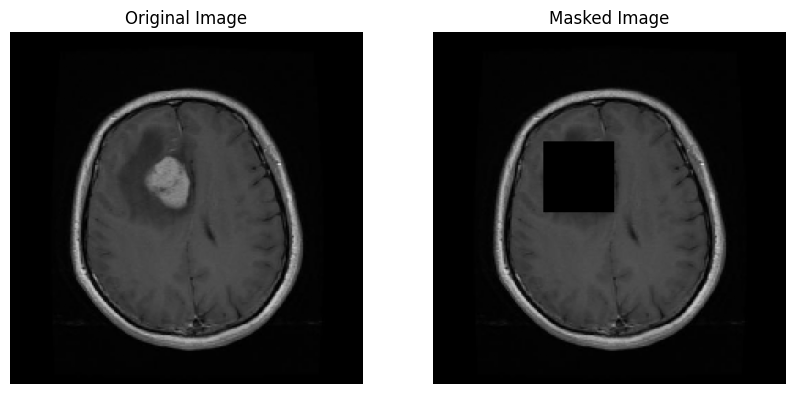

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(70,70)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


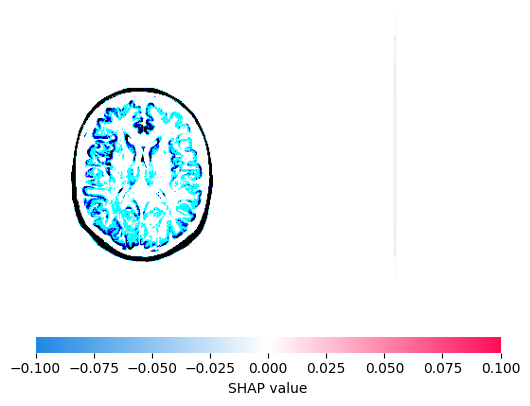

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-no1_0348.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


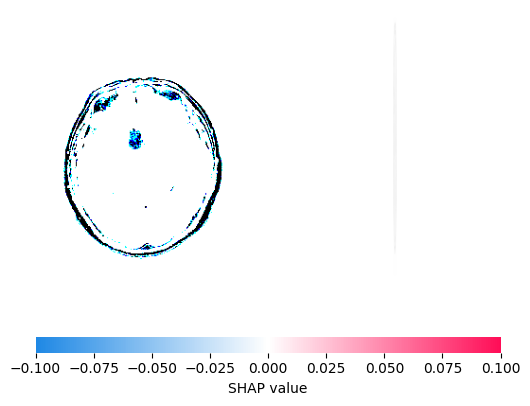

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


1/1 [==============================] - 1s 638ms/step
Original Prediction: [[0.34065017 0.6593498 ]]
Masked Prediction: [[0.4435981 0.5564019]]


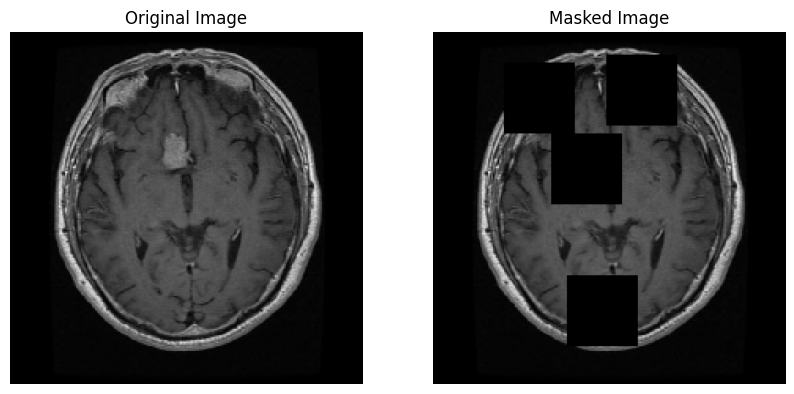

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    """Load and preprocess the image for the model"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

def apply_masks(img_array, size=50, positions=[(100, 100)], direction='top_right'):
    """ Apply square black masks to given positions on the image array """
    masked_img = np.copy(img_array)
    for position in positions:
        x, y = position
        if direction == 'top_right':
            x_end = max(0, x - size)
            y_end = max(0, y - size)
            masked_img[x_end:x, y_end:y, :] = 0
        elif direction == 'bottom_left':
            masked_img[x:x+size, y:y+size, :] = 0
        elif direction == 'very_bottom':
            masked_img[-size:, :, :] = 0
    return masked_img

img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg'
original_img_array = load_and_preprocess_image(img_path, target_size=(224, 224))  # Adjust target size if needed

mask_positions = [(20,45),(15,110),(65,75),(155,85)]  # Change positions of the masks

masked_img_array = apply_masks(original_img_array, size=45, positions=mask_positions, direction='bottom_left')

masked_img_array_expanded = np.expand_dims(masked_img_array, axis=0)
original_img_array_expanded = np.expand_dims(original_img_array, axis=0)

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
model = load_model(model_path)

# Make predictions
original_pred = model.predict(original_img_array_expanded)
masked_pred = model.predict(masked_img_array_expanded)

print("Original Prediction:", original_pred)
print("Masked Prediction:", masked_pred)

# Plot the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img_array)
plt.title('Masked Image')
plt.axis('off')
plt.show()


**LRP**

1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 875.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: t

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


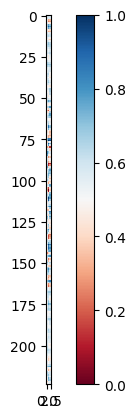

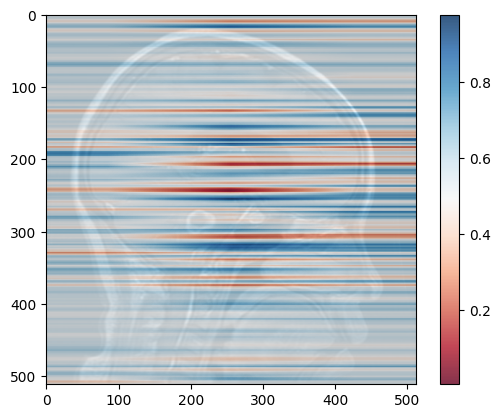

In [ ]:
!pip install innvestigate
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg19 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


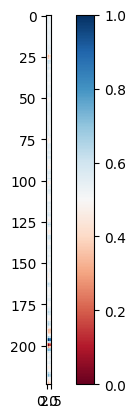

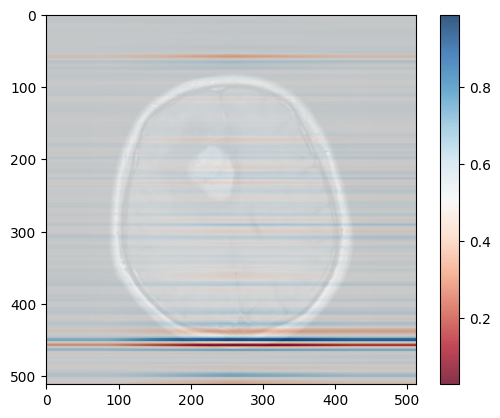

In [ ]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg19 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


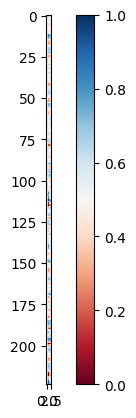

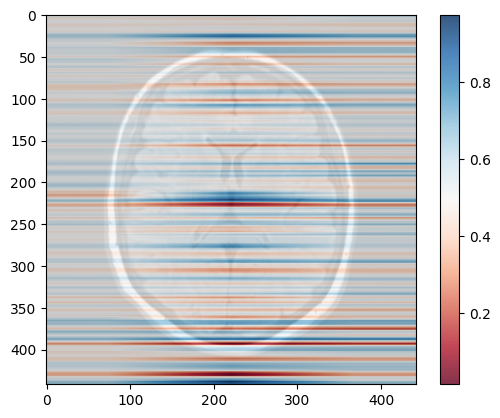

In [ ]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-no1_0348.jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg19 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


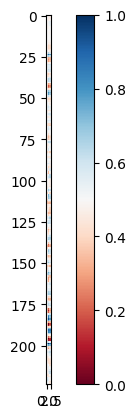

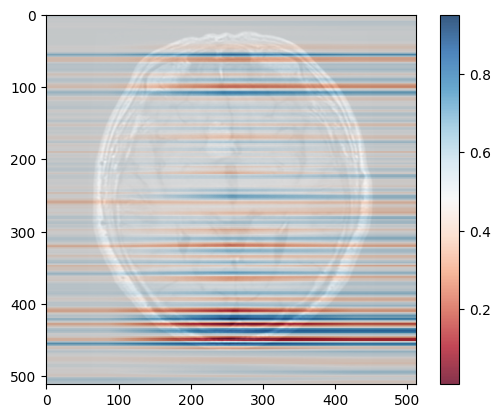

In [ ]:
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import innvestigate.utils as iutils
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Set the paths for the model and image
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model104'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-pi1_0032.jpg' # Replace with your image path

# Load the pre-trained model
model = load_model(model_path)

# Preprocess the MRI image
# This preprocessing should be the same as you used when you trained your VGG16 model
def preprocess_image(image_path):
    from keras.preprocessing import image
    from keras.applications.vgg19 import preprocess_input

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(img_path)

# Removing the softmax layer from the model to make it compatible with LRP
layer_output = model.layers[-2].output
model_wo_softmax = Model(inputs=model.input, outputs=layer_output)

# Create an LRP analyzer
analyzer = innvestigate.create_analyzer('lrp.z', model_wo_softmax)

# Analyze the image with LRP
analysis = analyzer.analyze(input_image)

# Postprocess the analysis to visualize it as a heatmap
# Sum over the color channels and normalize the values
heatmap = np.sum(analysis, axis=1)
heatmap = np.squeeze(heatmap)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

# Display the heatmap
plt.imshow(heatmap, cmap='RdBu', interpolation='nearest')
plt.colorbar()
plt.show()

# Load the original image
original_img = plt.imread(img_path)

# Resize heatmap to the size of the original image
import cv2
heatmap_resized = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

# Overlay the heatmap on the original image
plt.imshow(original_img, cmap='gray', alpha=0.9)
plt.imshow(heatmap_resized, cmap='RdBu', alpha=0.8, interpolation='nearest')
plt.colorbar()
plt.show()



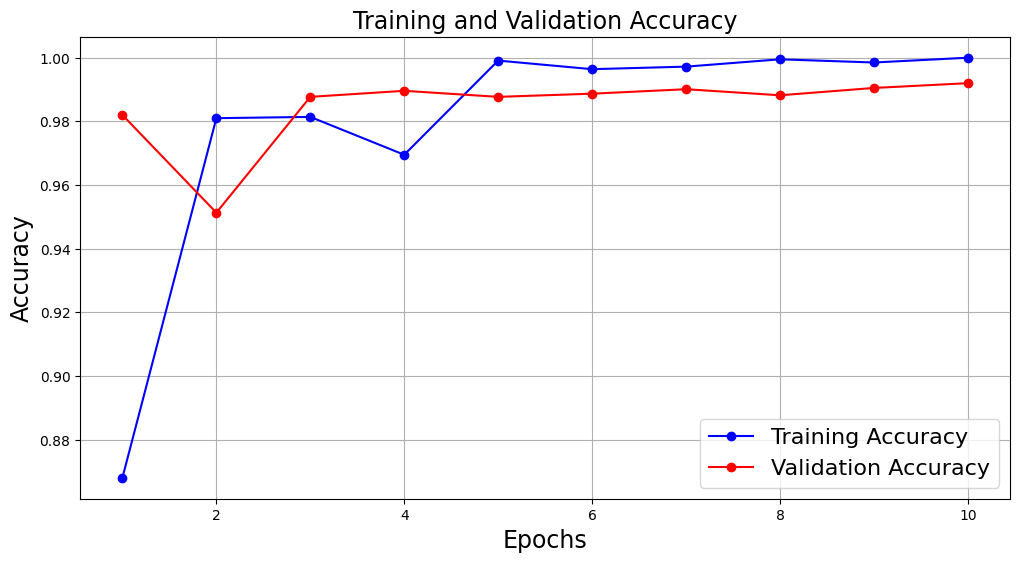

In [ ]:
import matplotlib.pyplot as plt

# Epoch data
epochs = range(1, 11)

# Training and validation accuracy data
train_accuracy = [0.8680, 0.9810, 0.9814, 0.9695, 0.9991, 0.9964, 0.9972, 0.9995, 0.9985, 1.0000]
val_accuracy = [0.9820, 0.9513, 0.9877, 0.9896, 0.9877, 0.9887, 0.9901, 0.9882, 0.9905, 0.9920]


# Plotting the accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=17)
plt.xlabel('Epochs',fontsize=17)
plt.ylabel('Accuracy',fontsize=17)
plt.legend(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

GRAD_cam

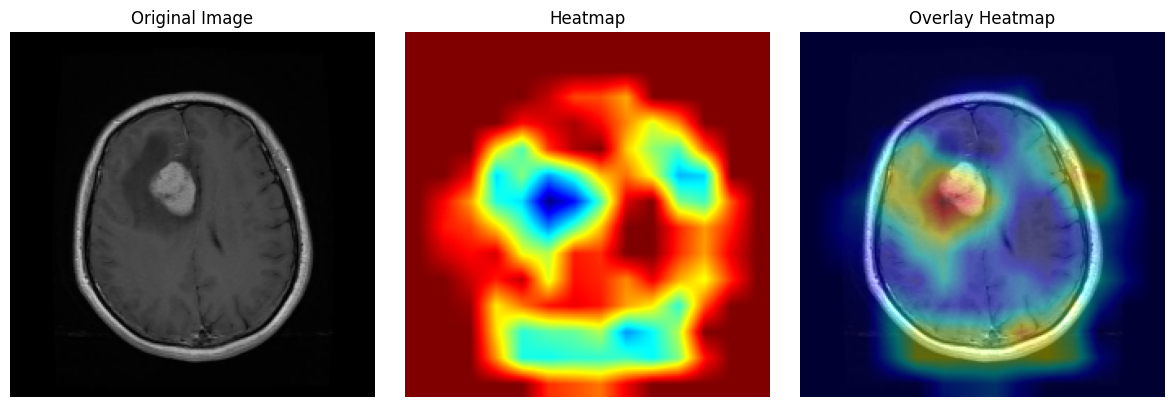

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


shap

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


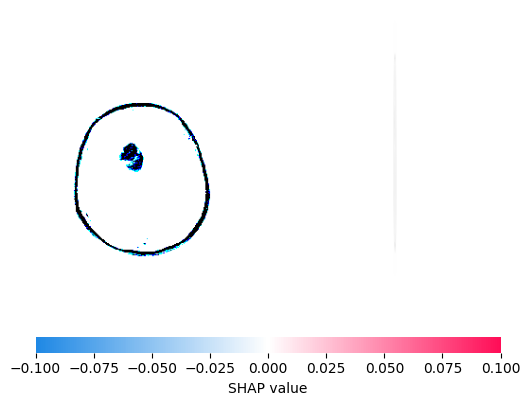

In [ ]:

import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-me1_0119.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


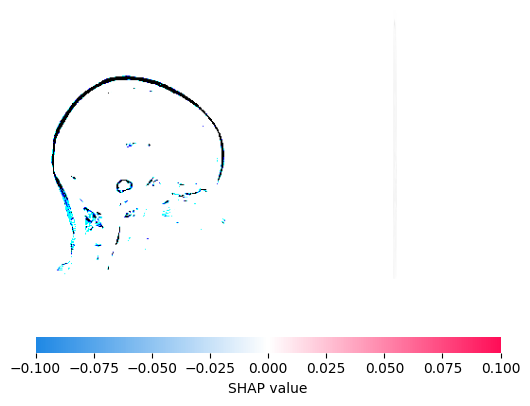

In [ ]:
import shap
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Path to the saved model and the image to be analyzed
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'  # Update this to the path of your image

# Load the pre-trained model
model = load_model(model_path)

# Function to load and preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess the image
x = load_preprocess_image(img_path)

# Create a SHAP DeepExplainer
explainer = shap.DeepExplainer(model, x)

# Compute SHAP values
shap_values = explainer.shap_values(x)

# Plot the SHAP values
# The index in shap_values[1] should correspond to the class you are interested in.
# For a binary classifier: index 0 for 'No Tumor', index 1 for 'Tumor'
shap.image_plot(shap_values[0], -x)


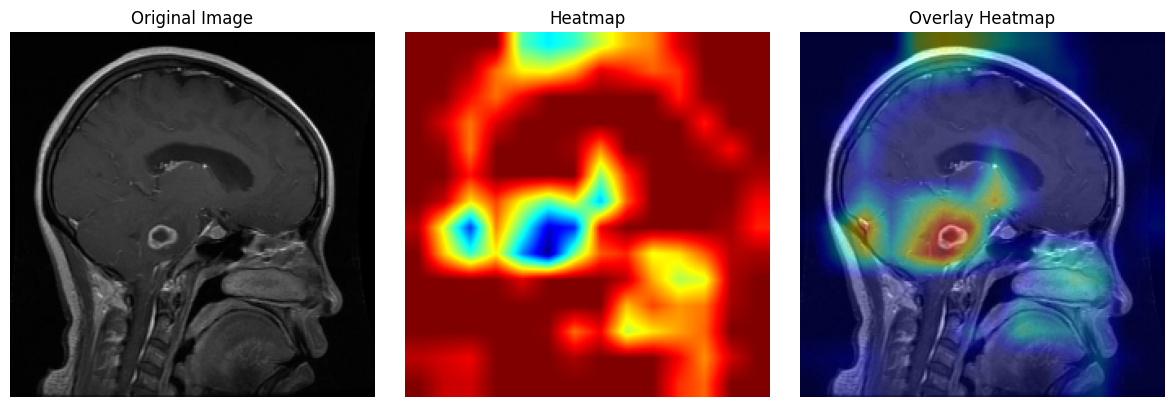

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import cv2

model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'

# Load the pre-trained model
model = load_model(model_path)


# Preprocess the image
def load_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Load and preprocess your image
img_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'  # Update with your path
preprocessed_img = load_preprocess_image(img_path)

# Grad-CAM algorithm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if isinstance(preds, (list, tuple)):  # Ensure preds is a tensor, not a list or tuple
            preds = preds[0]
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate the gradients of the top predicted class for the last conv layer output
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Pool the gradients across all the axes leaving out the channel dimension
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to a range of 0 to 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create the heatmap
last_conv_layer_name = 'block5_conv4'  # Update with your last conv layer name
heatmap = make_gradcam_heatmap(preprocessed_img, model, last_conv_layer_name)

# Superimpose the heatmap over the original image
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to the same size as model input
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))  # Resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    # Create a figure to display original, heatmap, and overlay
    plt.figure(figsize=(12, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    # Overlay
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Overlay Heatmap')
    plt.axis('off')

    # Show and save the figure
    plt.tight_layout()
    plt.show()
    plt.savefig('/content/drive/MyDrive/f/gradcam_composite.jpg')

# Apply Grad-CAM
save_and_display_gradcam(img_path, heatmap)


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━

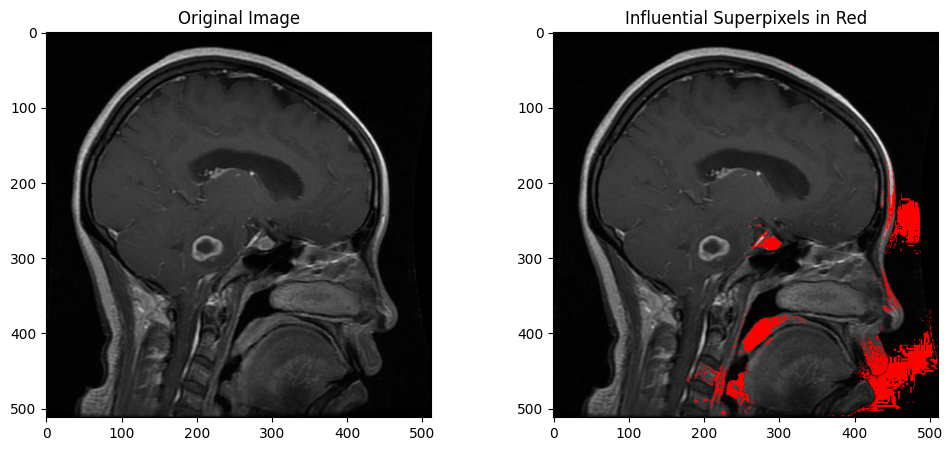

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer

# Load your pre-trained model
model_path = '/content/drive/MyDrive/498R_models/VGG19-Model114.keras'
model = tf.keras.models.load_model(model_path)

def predict_fn(images):
    images = np.array([cv2.resize(img, (224, 224)) for img in images])
    predictions = model.predict(images)
    return predictions

explainer = LimeImageExplainer()

selected_image_path = '/content/drive/MyDrive/498R_Test_Set/Te-gl1_0167.jpg'
selected_image = cv2.imread(selected_image_path)

# Get the explanation for the image
explanation = explainer.explain_instance(selected_image.astype('double'), predict_fn, top_labels=1, num_samples=2000)

# Retrieve the mask for the top 1 label and convert segments into full red color for influential superpixels
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label_to_explain, positive_only=True, num_features=10, hide_rest=False)

# Create a new image that overlays the important superpixels in red
masked_image = selected_image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j]:
            masked_image[i, j] = [0, 0, 255]  # Red color in BGR format

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Influential Superpixels in Red')
plt.show()
